<a href="https://colab.research.google.com/github/jackiemacguire/learning-archive/blob/main/MNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 19.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 476kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.1MB/s]


Epoch [1/5], Loss: 0.4537
Epoch [2/5], Loss: 0.2051
Epoch [3/5], Loss: 0.1506
Epoch [4/5], Loss: 0.1196
Epoch [5/5], Loss: 0.1022
Test Accuracy: 96.98%


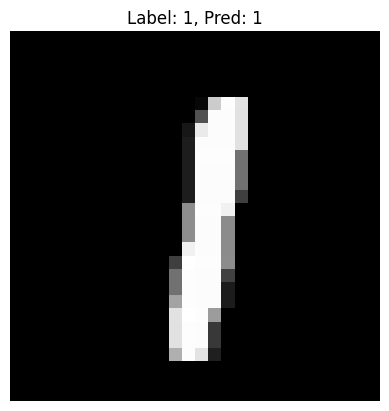

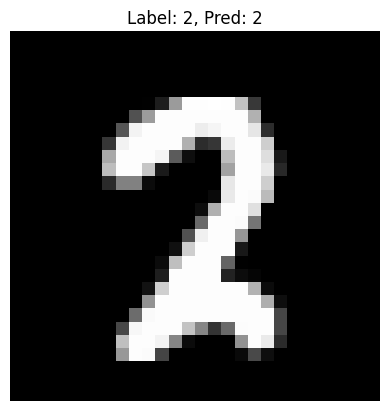

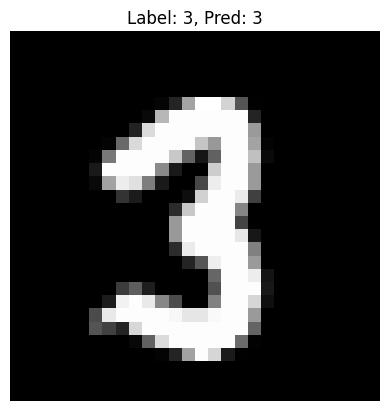

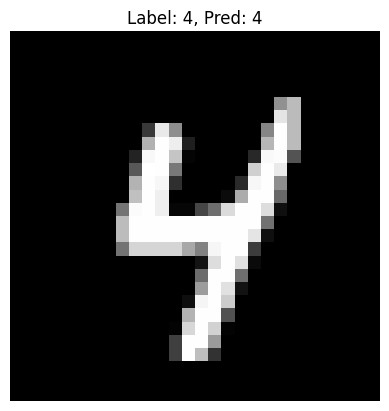

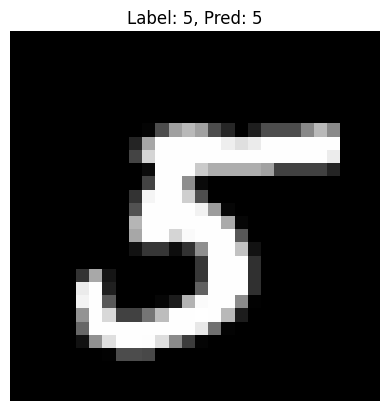

In [ ]:
# Step 1: download the dataset and installs dependencies
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Step 2: Transforms (convert image  to tensor) and normaize data
    # and then load the datasets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) #[-1,1] because it's reccomended, transforms.Normalize(mean, standard deviatiom)
])

training_dataset=datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_dataset=datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Step 3: Prepare the data by creating loaders // need batch and shuffle
training_loader= torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)
testing_loader= torch.utils.data.DataLoader(testing_dataset, batch_size=64, shuffle=False)

# Step 4: Define the Neural Network

class MNISTNet(nn.Module):
  def __init__(self):
    super(MNISTNet, self).__init__()
    self.input_layer = nn.Linear(28*28, 128) # flattens image to 784 values and connects it to 128 neurons
    self.hidden_layer_one = nn.Linear(128,64) # takes the 128 from layer above and looks for simple shape patterns
    self.hidden_layer_two = nn.Linear(64,32) # takes 64 from layer above and looks for more complex patterns
    self.output = nn.Linear(32,10)
  def forward(self, image):# defining how the data flows
    image = image.view(-1, 28*28) #flattens
    image = F.relu(self.input_layer(image)) #input layer and activation
    image = F.relu(self.hidden_layer_one(image)) #hidden layer 1 and activation
    image = F.relu(self.hidden_layer_two(image)) #hidden layer 2 and activation
    image = self.output(image)
    return image

# Step 5: Get Images from Test so that you can see the images/dataset
data_iter = iter(testing_loader)
images, labels = next(data_iter) # gets the first batch

def imshow(image, label=None, pred=None):
    image = image / 2 + 0.5  # unnormalizes data [-1,1] to [0,1]
    np_img = image.numpy()
    plt.imshow(np_img, cmap='gray')
    title = ''
    if label is not None:
        title += f"Label: {label}"
    if pred is not None:
        title += f", Pred: {pred}"
    plt.title(title)
    plt.axis('off')
    plt.show()


# Step 6: Create the Training loop

model = MNISTNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(5): #training loop
    running_loss = 0.0
    for images, labels in training_loader: #for each batch loop
        outputs = model(images) #forward pass
        loss = criterion(outputs, labels) # compute loss

        optimizer.zero_grad() #back propagate
        loss.backward()

        optimizer.step() #update weight

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{5}], Loss: {running_loss/len(training_loader):.4f}")

# Step 7: Test the Data
correct = 0
total = 0
model.eval()  # sets the model to evaluation mode
with torch.no_grad(): # gradient not needed for test
    for images, labels in testing_loader:
        outputs = model(images) #forward pass
        _, predicted = torch.max(outputs.data, 1) #max score index
        total += labels.size(0) # counts total test images
        correct += (predicted == labels).sum().item() #counts correct predictions

# Step 8: Print Accuracy
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")
for i in range(5):
    imshow(images[i].squeeze(), label=labels[i].item(), pred=predicted[i].item())


